In [183]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv("./data/sapling-tx.csv")
data.tail()
data['NS'].dtype

dtype('int64')

In [184]:
# Transform data for a multiline plot
data['NS'] = data['NS'].apply(lambda x : x / 1000000)
data.rename(columns={'NS':'MS'}, inplace=True)

In [185]:
data = data[(data['VIN'] == 0) & (data['VOUT'] == 0)]
data.tail()

,Unnamed: 0,TX HASH,COINBASE,VERSION,VIN,VOUT,SHIELDEDSPEND,SHIELDEDOUT,MS
12915,1391850,1b0c31ce4c,0,4,0,0,1.0,2.0,36.8851
12916,1391851,cf7b274e31,0,4,0,0,1.0,2.0,40.3708
12917,1391852,de1c6878f2,0,4,0,0,1.0,2.0,41.7912
12918,1391853,cf7b274e31,0,4,0,0,1.0,2.0,34.4091
12919,1391862,6f59c32cca,0,4,0,0,1.0,2.0,49.6624


In [186]:
data_max = data[(data['SHIELDEDSPEND'] <= 15) & (data['SHIELDEDOUT'] <= 15)]

data_1_out = data_max[(data_max['SHIELDEDOUT'] == 1)] # all tx with out ==1
data_1_in = data_max[(data_max['SHIELDEDSPEND'] == 1)] # all tx with in ==1

spend_data = pd.DataFrame()
out_data = pd.DataFrame()

# All Shield Spend TX with ONE Shield Output
spend_data['SPENDs/OUTs'] = data_1_out['SHIELDEDSPEND']
spend_data['MS'] = data['MS']
spend_data['Type'] = 'SHIELDEDSPEND'

# All Shield OUT TX with ONE Shield SPEND
out_data['SPENDs/OUTs'] = data_1_in['SHIELDEDOUT']
out_data['MS'] = data['MS']
out_data['Type'] = 'SHIELDEDOUT'

multiline_data = spend_data.append(out_data)
multiline_data.head()

#sns.lineplot(data=data_1_out, x='SHIELDEDSPEND', y='MS', palette = "hot")

,SPENDs/OUTs,MS,Type
1,1.0,78.1671,SHIELDEDSPEND
62,1.0,33.0467,SHIELDEDSPEND
116,1.0,66.5788,SHIELDEDSPEND
120,3.0,85.2766,SHIELDEDSPEND
158,8.0,149.3918,SHIELDEDSPEND


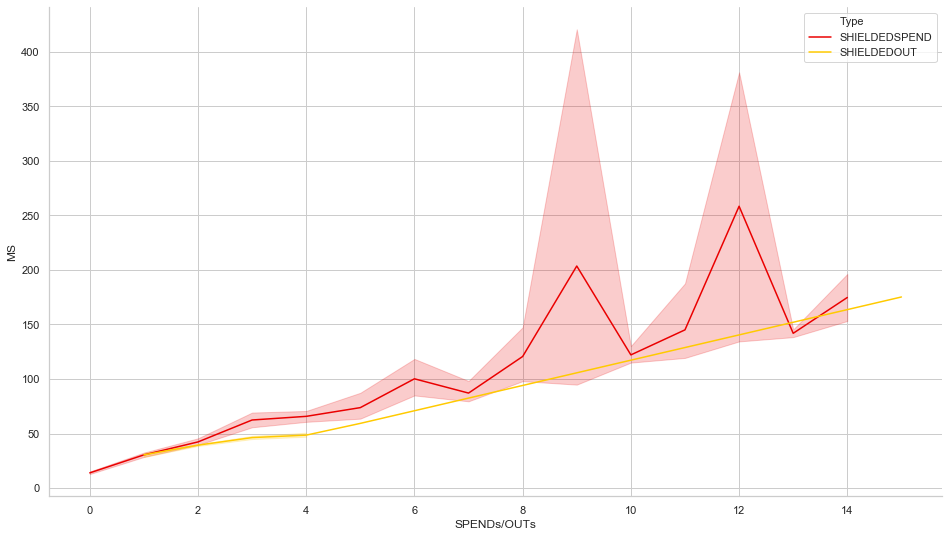

In [187]:
plt.figure(figsize = (16,9))
sns.lineplot(data=multiline_data, x='SPENDs/OUTs', y='MS', palette = "hot", hue='Type')
sns.despine()

In [188]:
spend_data = pd.DataFrame()
out_data = pd.DataFrame()

spend_data['SPENDs/OUTs'] = data['SHIELDEDSPEND']
spend_data['MS'] = data['MS']
spend_data['Type'] = 'SHIELDEDSPEND'

out_data['SPENDs/OUTs'] = data['SHIELDEDOUT']
out_data['MS'] = data['MS']
out_data['Type'] = 'SHIELDEDOUT'

multiline_data = spend_data.append(out_data)

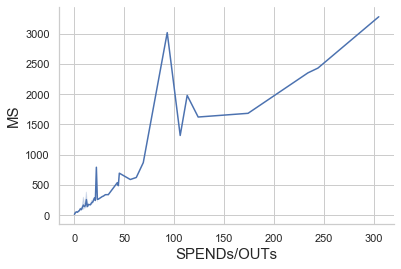

In [189]:
#plt.figure(figsize = (16,9))
sns.set(style='whitegrid',)
plt.xlabel("SPENDs/OUTs", fontsize = 15)
plt.ylabel("MS", fontsize = 15)
sns.lineplot(data=multiline_data, x='SPENDs/OUTs', y='MS', palette = "hot")
sns.despine()

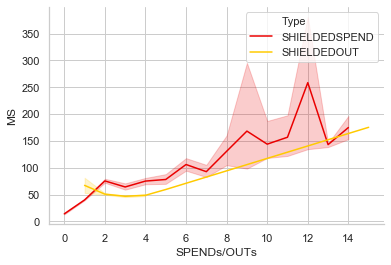

In [190]:
multiline_data = multiline_data[multiline_data['SPENDs/OUTs'] <= data['SHIELDEDOUT'].max()]

sns.lineplot(data=multiline_data, x='SPENDs/OUTs', y='MS', hue='Type', palette = "hot")
sns.despine()